# Highlighting outliers / Compare feature magnitude

In [10]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [9]:
df_cars = pd.read_csv('data/used_vehicles.csv')
df_cars.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
3,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,2.0,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
4,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,2966.0,4038.0,6240.0,8496.0,2980.0,4115.0,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533


### Visualize the variable distribution with histograms:
- create plots to distinguish the variable distributions in the entire dataset

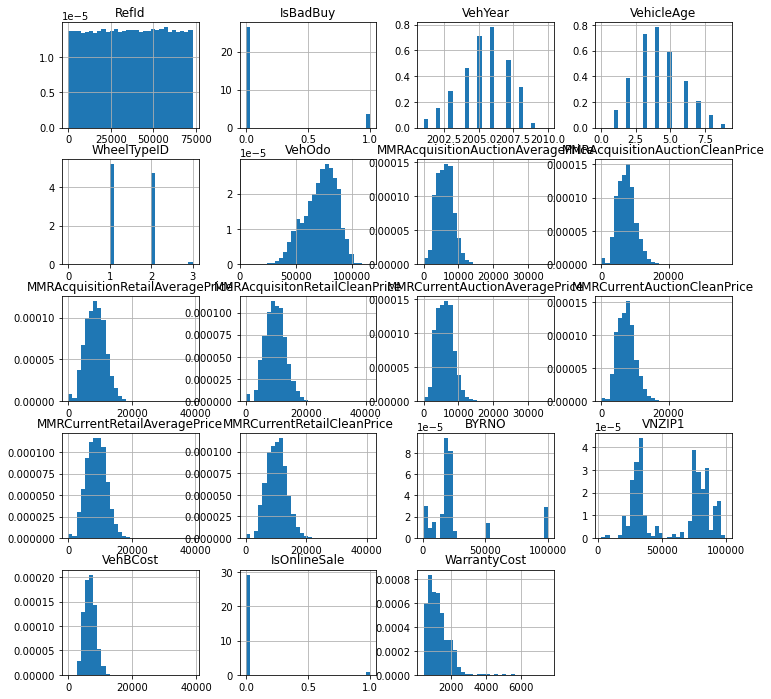

In [7]:
# normalize the histogram by setting density to True
df_cars.hist(bins=30, figsize=(12,12), density=True)
plt.show()

An `outlier` is a data point which is significantly different from the remaining data. It deviates so much from the other observations.

Identify outliers using `boxplots` and the `inter-quantile range proximity` rule.

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

- `Upper boundary` = 75th quantile + (IQR * 1.5)

- `Lower boundary` = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

- `IQR` = 75th quantile - 25th quantile

In the boxplot displayed below, the IQR is indicated by the box, the median is indicated by the line within the box, the top and bottom edges of the box correspond to the 75th and 25th quantile, and the whiskers  mark the proximity rule boundaries as described above. 

Values that `fall outside` the whiskers are considered outliers.

Text(0.5, 1.0, 'Boxplot')

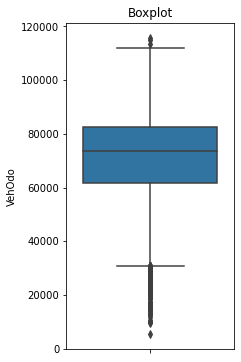

In [11]:
# boxplot
plt.figure(figsize=(3,6)) 
sns.boxplot(y=df_cars['VehOdo'])
plt.title('Boxplot')

> ### Find the upper and lower boundaries using the IQR proximity rule function

In [15]:
def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate the boundaries.
    #it is also common practice to find extreme values by multiplying the IQR by 3
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [16]:
# find the boudaries for the variable VehOdo 

upper_boundary, lower_boundary = find_boundaries(df_cars, 'VehOdo', 1.5)
upper_boundary, lower_boundary

(113394.875, 30949.875)

## NumPy's where() method

Produces a `boolean vector` with `True` if the value was an outlier. 

The `where()` method scans the rows of the VehOdo variable, and if the value was bigger than the upper boundary, it assigned True.

Whereas **if the value was smaller**, the `second where()` nested inside the first one and checked whether the value was smaller than the lower boundary, in which case it also assigned True, otherwise False .

In [23]:
# flag the outliers in the data set
outliers = np.where(df_cars['VehOdo'] > upper_boundary, True, np.where(df_cars['VehOdo'] < lower_boundary, True, False))

outliers

array([False, False, False, ..., False, False, False])

In [24]:
# outliers found
outliers.sum()

235

In [26]:
print(df_cars.shape)

outliers_df = df_cars.loc[outliers, 'VehOdo']
outliers_df.head()

(51088, 34)


86      23881
282     25830
834     10643
837     22500
1044    30471
Name: VehOdo, dtype: int64

In [27]:
# Remove outliers
tmp = df_cars.loc[~outliers, 'VehOdo']
tmp.shape

(50853,)

Text(0.5, 1.0, 'Boxplot (VehOdo without outliers)')

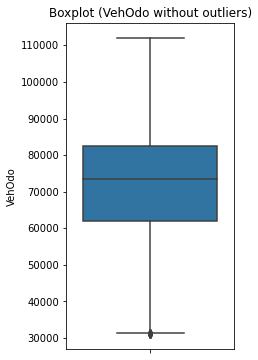

In [32]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=tmp)
plt.title('Boxplot (VehOdo without outliers)')

<AxesSubplot:xlabel='VehOdo', ylabel='Count'>

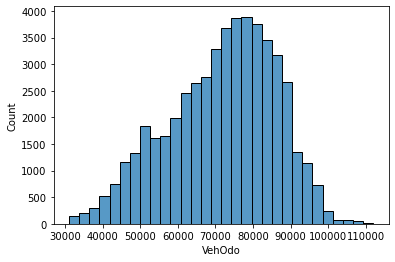

In [34]:
# VehOdo without outliers
sns.histplot(tmp, bins=30)

<AxesSubplot:xlabel='VehOdo', ylabel='Count'>

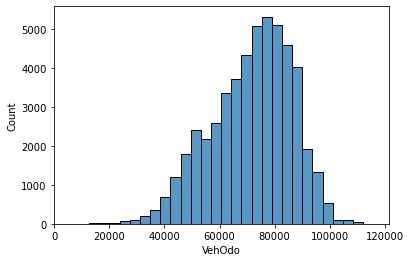

In [36]:
# VehOdo with outliers
sns.histplot(df_cars['VehOdo'], bins=30)

### Compare feature magnitude

In [49]:
df_cars.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,51088.000000,51088.000000,51088.000000,51088.000000,48819.000000,51088.000000,51076.000000,51076.000000,51076.000000,51076.000000,50872.000000,50872.000000,50872.000000,50872.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000
mean,36618.299503,0.123101,2005.345893,4.172780,1.494992,71550.864880,6130.263999,7376.365671,8497.024434,9853.113086,6135.332934,7394.514251,8776.393262,10146.978357,26376.254913,58154.511764,6728.222272,0.025035,1276.712320
std,21047.637595,0.328557,1.727976,1.709315,0.521792,14610.426618,2461.426275,2721.803428,3155.655885,3385.328527,2432.202199,2682.701099,3087.064877,3305.865439,25727.370369,26148.295399,1768.991083,0.156234,600.140901
min,1.000000,0.000000,2001.000000,0.000000,0.000000,5368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18479.250000,0.000000,2004.000000,3.000000,1.000000,61866.750000,4273.000000,5406.000000,6268.000000,7483.000000,4279.000000,5415.000000,6533.000000,7781.000000,17212.000000,32124.000000,5425.000000,0.000000,837.000000
50%,36685.000000,0.000000,2005.000000,4.000000,1.000000,73434.500000,6099.500000,7306.500000,8435.500000,9772.000000,6063.000000,7308.000000,8715.000000,10099.500000,19662.000000,74135.000000,6700.000000,0.000000,1169.000000
75%,54851.500000,0.000000,2007.000000,5.000000,2.000000,82478.000000,7768.000000,9027.000000,10648.000000,12088.000000,7743.000000,9018.000000,10915.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73013.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,38785.000000,1.000000,7498.000000


In [60]:
df_cars.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [69]:

columns = ['VehYear', 'VehicleAge', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice','VehBCost']


result1 = df_cars[columns].max()

result1


VehYear                              2010.0
VehicleAge                              9.0
MMRAcquisitionAuctionCleanPrice     36859.0
MMRAcquisitionRetailAveragePrice    39080.0
MMRAcquisitonRetailCleanPrice       41482.0
MMRCurrentAuctionAveragePrice       35722.0
MMRCurrentAuctionCleanPrice         36859.0
MMRCurrentRetailAveragePrice        39080.0
MMRCurrentRetailCleanPrice          41062.0
VehBCost                            38785.0
dtype: float64

In [70]:
result2 = df_cars[columns].min()

result2

VehYear                             2001.0
VehicleAge                             0.0
MMRAcquisitionAuctionCleanPrice        0.0
MMRAcquisitionRetailAveragePrice       0.0
MMRAcquisitonRetailCleanPrice          0.0
MMRCurrentAuctionAveragePrice          0.0
MMRCurrentAuctionCleanPrice            0.0
MMRCurrentRetailAveragePrice           0.0
MMRCurrentRetailCleanPrice             0.0
VehBCost                               1.0
dtype: float64

In [71]:
res = result1 - result2
res

VehYear                                 9.0
VehicleAge                              9.0
MMRAcquisitionAuctionCleanPrice     36859.0
MMRAcquisitionRetailAveragePrice    39080.0
MMRAcquisitonRetailCleanPrice       41482.0
MMRCurrentAuctionAveragePrice       35722.0
MMRCurrentAuctionCleanPrice         36859.0
MMRCurrentRetailAveragePrice        39080.0
MMRCurrentRetailCleanPrice          41062.0
VehBCost                            38784.0
dtype: float64